<h3>To run cells, click into one and press <i>Run</i> up on the bar</h3>
<h4>A shortcut is Shift+Enter to run a cell/box</h4>
<h4>The Python interpreter will keep things in memory from cell to cell</h4>
<h4>The <i>Kernel</i> section is useful if you need to interrupt or restart for any reason</h4>

In [4]:
# run this box if you don't already have these installed
#    or run these in command line

# you can also use command line to install these with 'conda install numpy' (for example) 
#    if using Anaconda

# !pip install numpy
# !pip install matplotlib

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import time

<h3>Implement the algorithms as described</h3>
<h4>You need to do the ### YOUR CODE HERE ### sections</h4>

In [6]:
# Use Greedy to find the minimum number of coins

# this changes coin counts into the actual coins
def get_result_greedy(coin_counts, coins):
    coins_used = []
    for i in range(len(coin_counts)):
        for j in range(coin_counts[i]):
            coins_used.append(coins[i])
    return coins_used

# Greedy implementation
def change_greedy(coins, value):
    if len(coins) <= 0:
        return 0
    
    n = len(coins)
    
    # coin_counts is the counts of coins you are using
    # coin_counts[i] = count(coin[i])
    coin_counts = [0]*len(coins)
    # coins_tmp is a replica of coins
    coins_tmp = coins[:]
    
    # Implement the greedy version as described in pdf
    # Remember to add to coin_counts[i] for coins[i], when appropriate
    if value in coins:
        return 1
    else:
        while (value):
            largest_coin = max(coins_tmp)
            while (value - largest_coin >= 0):
                value -= largest_coin
                coin_counts[coins_tmp.index(largest_coin)] += 1
            max_index = coins_tmp.index(largest_coin)
            coins_tmp[max_index] = 1
    
        # return the counts
        # will be converted in get_result_greedy()
        return coin_counts

In [7]:
# Test your greedy implementation
# It should pass assert statements

def test_greedy():
    coins = [1, 10, 25, 50]
    value = 40
    coin_counts = change_greedy(coins, value)
    num_coins = sum(coin_counts)
    coins_used = get_result_greedy(coin_counts, coins)
    assert num_coins == 7, 'Wrong number of coins'
    assert coins_used == [1, 1, 1, 1, 1, 10, 25], 'Wrong coins used'
    assert sum(coins_used) == value, 'Incorrect change value'
    print('Value: {}, Number of coins: {}, Coins used: {}'.format(value, num_coins, coins_used))
test_greedy()

Value: 40, Number of coins: 7, Coins used: [1, 1, 1, 1, 1, 10, 25]


In [19]:
# Use Dynamic Programming to find the minimum number of coins

# ans is the coins you are using, returned by change_dp()
def get_result_dp(ans, value):
    count = value
    coins_used = []
    while count > 0:
        coins_used.append(ans[count])
        count = count - ans[count]
    return coins_used
    

# dynamic programming implementation
def change_dp(coins, value): 
    
    n = len(coins)
    
    # table[i] will be storing the minimum 
    #   number of coins required for value i 
    table = [0 for i in range(value + 1)]

    # ans[i] will be the coins array index of first coin
    #   you make change with at value i
    # we fill with -1 for non-existent values
    ans = [-1 for i in range(value + 1)]

    # Base case (If given value is 0)
    # Can't make change for 0 
    table[0] = 0

    # Initialize all table values as infinite
    for i in range(1, value + 1): 
        table[i] = sys.maxsize 
        
    counter = 0

    # Compute minimum coins required  
    # for all values i from 1 to value
    # Be sure to store the first coin you use at each i value
    for i in range(value + 1):
        for j in range(n):
            if coins[j] <= i:
                result = table[i - coins[j]]
                if result != sys.maxsize and result + 1 < table[i]:
                    table[i] = result + 1
                    ans[i] = coins[j]     
                    counter += 1
    
    # return minimum coins and the coins we used
    print(counter)
    return table[value], ans

In [20]:
# Test your DP implementation
# It should pass assert statements
def test_dp():
    coins = [1, 10, 25, 50]  
    value = 40
    
    num_coins, ans = change_dp(coins, value)
    coin_usage = get_result_dp(ans, value)
    
#     assert num_coins == 4, 'Wrong number of coins'
#     assert coin_usage == [10, 10, 10, 10], 'Wrong coin types'
#     assert sum(coin_usage) == value, 'Incorrect change value'
    
#     print('Value: {}, Number of coins: {}, Coins used: {}'.format(value, len(coin_usage), coin_usage)) 

test_dp()

46


In [7]:
# Use DP to calculate the possible ways to make change for a given value

def count_dp(coins, value):
    n = len(coins)
    # store the number of possible ways in the table
    # the table will be indexed by 0, 1, 2,..., value where T[i] is the possible ways to make change for a given value
    table = [[0 for i in range(n)] for i in range(value + 1)]
    
    for i in range(n):
        table[0][i] = 1
        
    for i in range(1, value + 1):
        for j in range(n):
            
            if i - coins[j] >=0:
                # if the coin can be used
                # derive the number of ways that made by the same coin
                x = table[i - coins[j]][j]
            else:
                # the coin can not be used
                x = 0
            
            # derive the number of ways that made by the smaller coin
            if j >= 1:
                y = table[i][j - 1]
            else:
                y = 0
                
            table[i][j] = x + y
            
    return table[value][n-1]

test_list = [1, 2, 3]
value = 4
print(count_dp(test_list, value))


4


<h3>Part 5 code for plots</h3>
<h4>You need to do the analysis in the report and explain what this represents</h4>

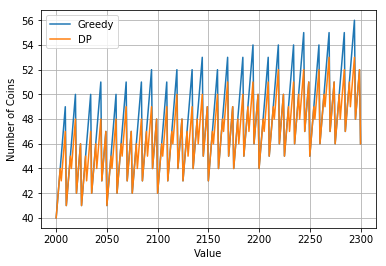

In [10]:
# part 5 plotting
# this should automatically work if your function is implemented

coins = [1, 10, 25, 50]
vals = [x for x in range(2000, 2301)]
greedy_returns = []
dp_returns = []

for val in vals:
    greedy_returns.append(len(get_result_greedy(change_greedy(coins, val), coins)))
    num_coins, ans = change_dp(coins, val)
    dp_returns.append(num_coins)

plt.plot(vals, greedy_returns, label='Greedy')
plt.plot(vals, dp_returns, label='DP')
plt.xlabel('Value')
plt.ylabel('Number of Coins')
plt.legend(loc='best')
plt.grid()

<h3>Part 6 code for plots</h3>
<h3>Modifying values</h3>
<h4>You need to do the analysis in the report and explain what this represents</h4>

In [7]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import sys
import time

class Count_Inversions:
    def __init__(self):
        self.count = 0
        self.list = []

    def brute_force(self) -> int:
        list = self.list
        size = len(self.list)
        self.count = 0
        for i in range(size-1):
            for j in range(i+1, size):
                if list[i] > list[j]:
                    self.count += 1
        return self.count

    def __helper_divide_and_conquer(self, list):
        size = len(list)
        mid = size // 2
        left_list  = list[:mid]
        right_list = list[mid:]
        if size > 1:
            self.__helper_divide_and_conquer(left_list)
            self.__helper_divide_and_conquer(right_list)
            # Merge-sorted sub arrays
            i, j = 0, 0
            for n in range(len(left_list) + len(right_list) + 1):
                if left_list[i] <= right_list[j]:
                    list[n] = left_list[i]
                    i += 1
                    if i == len(left_list) and j != len(right_list):
                        while j != len(right_list):
                            n += 1
                            list[n] = right_list[j]
                            j += 1
                        break
                elif left_list[i] > right_list[j]:
                    list[n] = right_list[j]
                    self.count += (len(left_list) - i)
                    j += 1
                    if j == len(right_list) and i != len(left_list):
                        while i != len(left_list):
                            n += 1
                            list[n] = left_list[i]
                            i += 1
                        break

    def divide_and_conquer(self) -> int:
        self.count = 0
        self.__helper_divide_and_conquer(self.list)
        return self.count

    def test(self):
        n_runs = 10
        bf_times = []
        dc_times = []
        vals1 = [x for x in range(100, 1000, 100)]
        vals2 = [x for x in range(1000, 10000, 1000)]
        vals = vals1 + vals2
        vals = [10, 20, 100, 9000]
        for val in vals:
            bf_time = 0
            dc_time = 0
            self.list = np.random.randint(1, 9, size=val)
            for i in range(n_runs):
                starttime = time.time()
                self.brute_force()
                endtime = time.time()
                bf_time += endtime - starttime

                starttime = time.time()
                self.divide_and_conquer()
                endtime = time.time()
                dc_time += endtime - starttime
            bf_times.append(bf_time / n_runs)
            dc_times.append(dc_time / n_runs)
        plt.plot(vals, bf_times, label='brute-force')
        plt.plot(vals, dc_times, label='divide-and-conquer')
        plt.grid()
        plt.legend(loc='best')

        # print(self.list)
        # print('BRUTE FORCE: ', self.brute_force())
        # print('DC:          ', self.divide_and_conquer())

c = Count_Inversions()
c.test()

KeyboardInterrupt: 

Greedy Slope: 0.8794039730065536, DP Slope: 0.9920716623217168


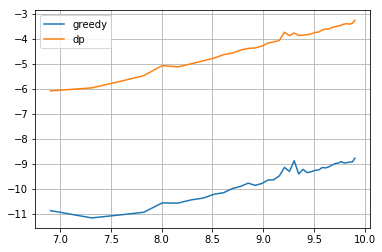

In [15]:
# you don't need to change anything here
# just run the cell
# if your implementations BOTH work

# I want you to look at the plot and explain the output well

coins = [1, 10, 25, 50]
vals = [x for x in range(1000, 20500, 500)]   # varying the value we pass in
greedy_times = []
dp_times = []

n_runs = 20
for val in vals:
    greedy_time = 0
    dp_time = 0
    for i in range(n_runs):
        starttime = time.time()
        coin_counts_greedy = change_greedy(coins, val)
        endtime = time.time()
        greedy_time += endtime-starttime

        starttime = time.time()
        num_coins, ans = change_dp(coins, val)
        endtime = time.time()
        dp_time += endtime-starttime
    greedy_times.append(greedy_time/n_runs)
    dp_times.append(dp_time/n_runs)

plt.plot(np.log(vals), np.log(greedy_times), label='greedy')
plt.plot(np.log(vals), np.log(dp_times), label='dp')
plt.grid()
plt.legend(loc='best')

slope_g, intercept_g = np.polyfit(np.log(vals), np.log(greedy_times), 1)
slope_d, intercept_d = np.polyfit(np.log(vals), np.log(dp_times), 1)

print('Greedy Slope: {}, DP Slope: {}'.format(slope_g, slope_d))

<h3>Modifying number of coins</h3>
<h4>You need to do the analysis in the report and explain what this represents</h4>

Greedy Slope: 1.2358509339754122, DP Slope: 0.9370653557953891


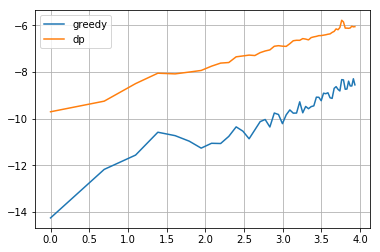

In [12]:
# you don't need to change anything here
# just run the cell
# if your implementations BOTH work

with np.errstate(divide='ignore'):
    # varying the coin denominations we are using
    # hopefully this doesn't break anything
    coins = [np.random.choice(np.arange(0, 100), size=x, replace=False) for x in range(0, 102, 2)]
    val = 127  # fixed value
    greedy_times = []
    dp_times = []
    n_runs = 20
    for coin in coins:
        # can not use np.array in the above function and need to transform it to list
        coin = coin.tolist()
        greedy_time = 0
        dp_time = 0
        for i in range(n_runs):
            starttime = time.time()
            coin_counts_greedy = change_greedy(coin, val)
            endtime = time.time()
            greedy_time += endtime-starttime

            starttime = time.time()
            num_coins, ans = change_dp(coin, val)
            endtime = time.time()
            dp_time += endtime-starttime
        greedy_times.append(greedy_time/n_runs)
        dp_times.append(dp_time/n_runs)

    plt.plot(np.log(np.arange(1, len(coins)+1)), np.log(greedy_times), label='greedy')
    plt.plot(np.log(np.arange(1, len(coins)+1)), np.log(dp_times), label='dp')
    plt.grid()
    plt.legend(loc='best')

    slope_g, intercept_g = np.polyfit(np.log(np.arange(1, len(coins)+1)), np.log(greedy_times), 1)
    slope_d, intercept_d = np.polyfit(np.log(np.arange(1, len(coins)+1)), np.log(dp_times), 1)

    print('Greedy Slope: {}, DP Slope: {}'.format(slope_g, slope_d))